<a href="https://colab.research.google.com/github/shiddema/Statistical-EDA/blob/main/Beak_EDA_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical EDA: 40 Years of Evolution 

This project will look into the data behind the book, "40 years of Evolution" by Peter & Rosemary Grant. These two scientist took extensive samples and measurements from the Galápagos Islands over a 40 year period. Their findings are regularly used as a study in adapative evolution in finches. 

There are two finches in particular that we will be looking at: the Fortis and the Scandens. Pictured below. 

<img src="https://imgbb.com/b6FZN9H" alt="Picture of Fortis and Scandens">

What they noticed is that over the decades their beak measurements changed. They observed a drought that affected the size of the seeds available on the island. The general conclusion is that the drought caused the need for the birds to evolve to meet the new food supply. We will be answering if this change took place, and how it happened. The Grants took many measurements, for our purposes we will limit our analysis to just a handful of attributes. The most important two to understand are beak depth and beak length. 

<img src="http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/_images/finch_beak_diagram.png" alt="Picture of Finch Beaks">

This notebook is long. Longer than it technically needs to be. There are many packages and functions in Python that can be used to condense this work. However, I am using this as an opportunity to look behind the curtain and renforce my own learning in Satitics. I think its important that we don't forget the underlying math and statistical thinking in a rush to implement the latest ML model. To that end the only packages imported are numpy and matplotlib. 

I am a big fan of this project. It is an interesting dataset. I hope you enjoy, but I hope you learn something. 


Notes:

1. The data for the Grants book can be found at: https://datadryad.org/stash/dataset/doi:10.5061/dryad.g6g3h
2. I have to thank Justin Bois a Teaching Professor at the California Institute of Technology. I learned more about satistics in his class than anywhere else. He is the one that inspired the interest in this dataset. Some of the functions in this notebook were either copied or inspired by his work. 
3. The datasets are fragmented. This project is not about pandas or data manipulation so I did not want that to be the focus. If you want to see that I am sure I have another post detailing that. I think its an important skill. However, here I have simply created numpy arrays with the necessary information. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

I have pulled only the 1975 and 2012 data. It was the easiest to access and it's all we need for our purposes. 'bd' stands for beak depth and 'bl' beak length. 

##### Beak depth and length arrays

In [ ]:
bd_1975 = np.array([ 8.4 ,  8.8 ,  8.4 ,  8.  ,  7.9 ,  8.9 ,  8.6 ,  8.5 ,  8.9 , 9.1 ,  8.6 ,  9.8 ,  8.2 ,  9.  ,  9.7 ,  8.6 ,  8.2 ,  9.  , 8.4 ,  8.6 ,  8.9 ,  9.1 ,  8.3 ,  8.7 ,  9.6 ,  8.5 ,  9.1 , 9.  ,  9.2 ,  9.9 ,  8.6 ,  9.2 ,  8.4 ,  8.9 ,  8.5 , 10.4 ,
        9.6 ,  9.1 ,  9.3 ,  9.3 ,  8.8 ,  8.3 ,  8.8 ,  9.1 , 10.1 , 8.9 ,  9.2 ,  8.5 , 10.2 , 10.1 ,  9.2 ,  9.7 ,  9.1 ,  8.5 , 8.2 ,  9.  ,  9.3 ,  8.  ,  9.1 ,  8.1 ,  8.3 ,  8.7 ,  8.8 , 8.6 ,  8.7 ,  8.  ,  8.8 ,  9.  ,  9.1 ,  9.74,  9.1 ,  9.8 ,
       10.4 ,  8.3 ,  9.44,  9.04,  9.  ,  9.05,  9.65,  9.45,  8.65, 9.45,  9.45,  9.05,  8.75,  9.45,  8.35])

bd_2012 = np.array([ 9.4 ,  8.9 ,  9.5 , 11.  ,  8.7 ,  8.4 ,  9.1 ,  8.7 , 10.2 , 9.6 ,  8.85,  8.8 ,  9.5 ,  9.2 ,  9.  ,  9.8 ,  9.3 ,  9.  , 10.2 ,  7.7 ,  9.  ,  9.5 ,  9.4 ,  8.  ,  8.9 ,  9.4 ,  9.5 , 8.  , 10.  ,  8.95,  8.2 ,  8.8 ,  9.2 ,  9.4 ,  9.5 ,  8.1 ,
        9.5 ,  8.4 ,  9.3 ,  9.3 ,  9.6 ,  9.2 , 10.  ,  8.9 , 10.5 , 8.9 ,  8.6 ,  8.8 ,  9.15,  9.5 ,  9.1 , 10.2 ,  8.4 , 10.  , 10.2 ,  9.3 , 10.8 ,  8.3 ,  7.8 ,  9.8 ,  7.9 ,  8.9 ,  7.7 , 8.9 ,  9.4 ,  9.4 ,  8.5 ,  8.5 ,  9.6 , 10.2 ,  8.8 ,  9.5 , 9.3 ,  9.  ,  9.2 ,  8.7 ,  9.  ,  9.1 ,  8.7 ,  9.4 ,  9.8 ,
        8.6 , 10.6 ,  9.  ,  9.5 ,  8.1 ,  9.3 ,  9.6 ,  8.5 ,  8.2 , 8.  ,  9.5 ,  9.7 ,  9.9 ,  9.1 ,  9.5 ,  9.8 ,  8.4 ,  8.3 , 9.6 ,  9.4 , 10.  ,  8.9 ,  9.1 ,  9.8 ,  9.3 ,  9.9 ,  8.9 , 8.5 , 10.6 ,  9.3 ,  8.9 ,  8.9 ,  9.7 ,  9.8 , 10.5 ,  8.4 , 10.  ,  9.  ,  8.7 ,  8.8 ,  8.4 ,  9.3 ,  9.8 ,  8.9 ,  9.8 , 9.1 ])

In [ ]:
bl_1975 = np.array([13.9 , 14.  , 12.9 , 13.5 , 12.9 , 14.6 , 13.  , 14.2 , 14.  , 14.2 , 13.1 , 15.1 , 13.5 , 14.4 , 14.9 , 12.9 , 13.  , 14.9 , 14.  , 13.8 , 13.  , 14.75, 13.7 , 13.8 , 14.  , 14.6 , 15.2 , 13.5 , 15.1 , 15.  , 12.8 , 14.9 , 15.3 , 13.4 , 14.2 , 15.1 , 15.1 , 14.  , 13.6 , 14.  , 14.  , 13.9 , 14.  , 14.9 , 15.6 ,
       13.8 , 14.4 , 12.8 , 14.2 , 13.4 , 14.  , 14.8 , 14.2 , 13.5 , 13.4 , 14.6 , 13.5 , 13.7 , 13.9 , 13.1 , 13.4 , 13.8 , 13.6 , 14.  , 13.5 , 12.8 , 14.  , 13.4 , 14.9 , 15.54, 14.63, 14.73, 15.73, 14.83, 15.94, 15.14, 14.23, 14.15, 14.35, 14.95, 13.95, 14.05, 14.55, 14.05, 14.45, 15.05, 13.25])

bl_2012 = np.array([14.3 , 12.5 , 13.7 , 13.8 , 12.  , 13.  , 13.  , 13.6 , 12.8 , 13.6 , 12.95, 13.1 , 13.4 , 13.9 , 12.3 , 14.  , 12.5 , 12.3 , 13.9 , 13.1 , 12.5 , 13.9 , 13.7 , 12.  , 14.4 , 13.5 , 13.8 , 13.  , 14.9 , 12.5 , 12.3 , 12.8 , 13.4 , 13.8 , 13.5 , 13.5 , 13.4 , 12.3 , 14.35, 13.2 , 13.8 , 14.6 , 14.3 , 13.8 , 13.6 ,
       12.9 , 13.  , 13.5 , 13.2 , 13.7 , 13.1 , 13.2 , 12.6 , 13.  , 13.9 , 13.2 , 15.  , 13.37, 11.4 , 13.8 , 13.  , 13.  , 13.1 , 12.8 , 13.3 , 13.5 , 12.4 , 13.1 , 14.  , 13.5 , 11.8 , 13.7 , 13.2 , 12.2 , 13.  , 13.1 , 14.7 , 13.7 , 13.5 , 13.3 , 14.1 , 12.5 , 13.7 , 14.6 , 14.1 , 12.9 , 13.9 , 13.4 , 13.  , 12.7 ,
       12.1 , 14.  , 14.9 , 13.9 , 12.9 , 14.6 , 14.  , 13.  , 12.7 , 14.  , 14.1 , 14.1 , 13.  , 13.5 , 13.4 , 13.9 , 13.1 , 12.9 , 14.  , 14.  , 14.1 , 14.7 , 13.4 , 13.8 , 13.4 , 13.8 , 12.4 , 14.1 , 12.9 , 13.9 , 14.3 , 13.2 , 14.2 , 13.  , 14.6 , 13.1 , 15.2 ])

I will be using the empirical cumulative Distribution Function of ECDF. ECDF is a fantastic statistical analysis tool, similar to the CDF.  
To learn more, check out [this video](https://www.youtube.com/watch?v=_2VDsKU-7SU)

We are going to use the ECDF to visually compare beak depths measured in 1975 and 2012. 
### Visual Analysis of Beak Depth

In [ ]:
def ecdf(data):

    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n

    return x, y

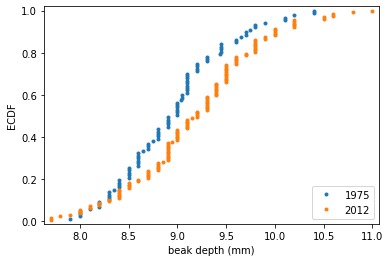

In [ ]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
plt.plot(x_1975, y_1975, marker='.', linestyle='none')
plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# labels
plt.margins(0.02)
plt.xlabel('beak depth (mm)')
plt.ylabel('ECDF')
plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

We can clearly see that there is a change over time. But how much? Next we will bootstrap a bunch of samples. This is called hacker statistics. It is using the power of python and computing in general to take a single dataset and amplify it. At the end of these steps we will have a p-value to determine if there is a statistical significant difference between the 1975 and 2012 measurements. 
 
We are looking to prove of disprove our **null hypothesis: there is no statistically significant difference in beak depth between 1975 and 2012**

In [ ]:
def bootstrap_replicate_1d(data, func):
    sample = np.random.choice(data, len(data))
    return func(sample)


def bs_reps(data, func, size=1):

    # array of replicates
    replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        replicates[i] = bootstrap_replicate_1d(data, func)

    return replicates

In [ ]:
# the difference of the sample means
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# bootstrap replicates of means
replicates_1975 = bs_reps(bd_1975, np.mean, size=10000)
replicates_2012 = bs_reps(bd_2012, np.mean, size=10000)

# Compute samples of difference of means: bs_diff_replicates
diff_replicates = replicates_2012 - replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06275493 0.39369705] mm


Lets pause here for just a second. 

We have replicated 10000 more datasets of both 1975 and 2012. How cool is that! Then we have found the means of 2012 and 1975 and come up with the mean. Simple, right? It really is! We just have done it with way more numbers than we have ever done by hand. 

We are halfway to getting the p-value. But if we stop and think about it we will realize that we already know the answer. .2mm doesn't sound like a lot. But given that these are finches and their beaks are in the range of 9mm it is! 



In [ ]:
# mean of combined data set
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
replicates_1975 = bs_reps(bd_1975_shifted, np.mean, size=10000)
replicates_2012 = bs_reps(bd_2012_shifted, np.mean, size=10000)

# Compute replicates of difference of means: bs_diff_replicates
diff_replicates = replicates_2012 - replicates_1975

# Compute the p-value
p = np.sum(diff_replicates >= mean_diff) / len(diff_replicates)

# Print p-value
print('p =', p)

p = 0.0037


A p-value of 0.0037 is low. We can say there is a statistically significant difference between the 1975 measurements and the 2012 measurements. And to put it in perspective a p-value of 0.025 is considered passable. 
 
This is a good first step. And there has been a fair bit of numbers without much visualization. Lets see how this looks. 


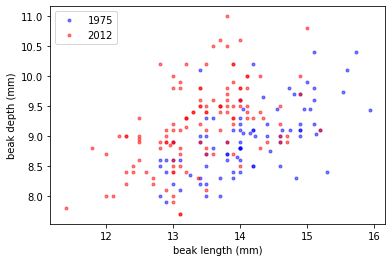

In [ ]:
#  1975 data
plt.plot(bl_1975, bd_1975, marker='.', linestyle='None', color='blue', alpha=0.5)

# 2012 data
plt.plot(bl_2012, bd_2012, marker='.', linestyle='None', color='red', alpha=0.5)

# Labels & legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='upper left')

plt.show()

So, looking at this plot we can see that beaks have gotten deeper, and shorter. You can see this because the red dots are higher on the y-axis and lower on the x-axis. So there it is not just that their beaks became deeper over time but the ratio of beak length to beak depth is altered. Visually the Grants probably were able to see the change in shape. 
 
Again we are using the visual to set up a hypothesis and now we will use some hacker statistics to prove or disprove it. In the last step we compared 1D-arrays. This time we want to see if the shape of the beak is changing. This requires additional functions. 
 
Linear Regression is one of the most common ways to compare the relationship between two variables. We are taking two variables and modeling a line that fits the data. There are lots of tools to do this. In this case we will write a function for bootstrapping for linear regression. We are then going to bootstrap our way to 1,000 iterations of the data. And then we will plot the data to visually analyze it again. 
 
### Null Hypothesis: There is no statistically significant change in the shape of the beak
 

In [ ]:
def bs_pairs_linreg(x, y, size=1):

    # array of indices to sample from
    inds = np.arange(len(x))

    # replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(x))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [ ]:
# linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975,1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012,1)

# pairs bootstrap for the linear regressions
slope_reps_1975, intercept_reps_1975 = bs_pairs_linreg(bl_1975, bd_1975, size=1000)
slope_reps_2012, intercept_reps_2012 = bs_pairs_linreg(bl_2012, bd_2012, size=1000)

# confidence intervals of slopes
slope_conf_int_1975 = np.percentile(slope_reps_1975, [2.5,97.5])
slope_conf_int_2012 = np.percentile(slope_reps_2012, [2.5,97.5])
intercept_conf_int_1975 = np.percentile(intercept_reps_1975, [2.5,97.5])

intercept_conf_int_2012 = np.percentile(intercept_reps_2012, [2.5,97.5])

# results
print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.3285243  0.59231465]
1975: intercept = 2.3908752365842263 conf int = [0.62594898 4.27427176]
2012: slope = 0.462630358835313 conf int = [0.32433885 0.59271018]
2012: intercept = 2.9772474982360198 conf int = [1.23854495 4.80494843]


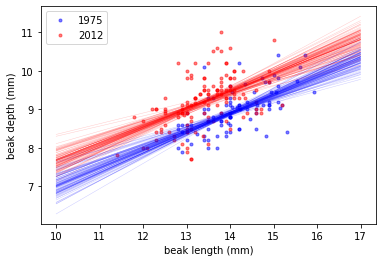

In [ ]:
# scatter plot of 1975 data
plt.plot(bl_1975, bd_1975, marker='.', linestyle='none', color='blue', alpha=0.5)

# scatter plot of 2012 data
plt.plot(bl_2012, bd_2012, marker='.', linestyle='none', color='red', alpha=0.5)

# axes and legend
plt.xlabel('beak length (mm)')
plt.ylabel('beak depth (mm)')
plt.legend(('1975', '2012'), loc='best')

# x-values for bootstrap lines
x = np.array([10, 17])

# bootstrap lines
for i in range(100):
    plt.plot(x, slope_reps_1975[i] * x + intercept_reps_1975[i], linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, slope_reps_2012[i] * x + intercept_reps_2012[i], linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

Ok. We are halfway to answering our Null Hypothesis. And we have a couple of interesting observations to make. First, linear regression was a good call for this question and data. We can clearly see the correlation. Second, looking at the overlapping confidence intervals and the overlapping bootstrapped lines on the plot, we cannot say there is any significant change. This is really a limitation of the grouping of the data. If you look at the approximate median of the plot, the regression lines converge. This makes sense. This is where we have the most data points and our regression lines are seeking the best fit given that data. So if we were to use linear regression to predict an additional data point it would have the best fit in this range. This concept is called the **Domain of Validity**. It suggests that when making predictions using linear regression that we need to be careful about blanket application of the model. 
 
Next what we will do is look at the ratios of the beak shape. Once again we will use hacker statistics and bootstrap replicates. 
 

In [ ]:
# Compute length-to-depth ratios
ratio_1975 = np.array(bl_1975/bd_1975)
ratio_2012 = np.array(bl_2012/bd_2012)

# Compute means
mean_ratio_1975 = ratio_1975.mean()
mean_ratio_2012 = ratio_2012.mean()

# Generate bootstrap replicates of the means
bs_replicates_1975 = bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975, [0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55725777 1.60043923]
2012: mean ratio = 1.4658342276847767 conf int = [1.44517107 1.48806987]


There is a change in the beaks. As we can see the ratios are different. There is zero overlap in the confidence intervals. So we can confidently say there is a statistically significant difference between the beak ratios measured in 1975 and the beak ratios measured in 2012. 
 
But what is causing this change? 
 
A common hypothesis is that there was a drought. The Grants observed that in the late 70s this drought affected some of the plant life more than others. The trickle down effect is that even if the seed volume left on the ground remained constant the size of seeds changed. The larger seeds became more prevalent. This meant that some breeds of finches had a harder time. The smaller beaked varieties like the scandens had a harder time with the seeds. The larger beaked fortis were able to eat these seeds. And then we see Darwin's fundamental principle at work. The theory being that the Fortis were healthier and bred with the Scandens. The Fortis beaks were a dominant gene and the offspring took on the traits of the Fortis and left the Scandens smaller beaks behind. This is a logical conclusion, but let us see if the data proves this out or not. 
 
**Are the observed beak changes caused by heritability?**
 
Note: heritability is a fancy genetics term with a meaning just like it sounds. Are the genetic traits being passed from parents to children?
 
Thankfully, the Grants were very diligent about taking measurements and tagging birds. So we have reliable information about the heritage of the finches. Below you will see that I have placed the necessary data in arrays. Our first step is to visualize the data.  

##### parent and offspring arrays

In [ ]:
bd_parent_scandens = np.array([ 8.3318,  8.4035,  8.5317,  8.7202,  8.7089,  8.7541,  8.773 , 8.8107,  8.7919,  8.8069,  8.6523,  8.6146,  8.6938,  8.7127, 8.7466,  8.7504,  8.7805,  8.7428,  8.7164,  8.8032,  8.8258, 8.856 ,  8.9012,  8.9125,  8.8635,  8.8258,  8.8522,  8.8974, 8.9427,  8.9879,  8.9615,  8.9238,  8.9351,  9.0143,  9.0558,
        9.0596,  8.9917,  8.905 ,  8.9314,  8.9465,  8.9879,  8.9804, 9.0219,  9.052 ,  9.0407,  9.0407,  8.9955,  8.9992,  8.9992, 9.0747,  9.0747,  9.5385,  9.4781,  9.4517,  9.3537,  9.2707, 9.1199,  9.1689,  9.1425,  9.135 ,  9.1011,  9.1727,  9.2217, 9.2255,  9.2821,  9.3235,  9.3198,  9.3198,  9.3198,  9.3273,
        9.3725,  9.3989,  9.4253,  9.4593,  9.4442,  9.4291,  9.2632, 9.2293,  9.1878,  9.1425,  9.1275,  9.1802,  9.1765,  9.2481, 9.2481,  9.1991,  9.1689,  9.1765,  9.2406,  9.3198,  9.3235, 9.1991,  9.2971,  9.2443,  9.316 ,  9.2934,  9.3914,  9.3989, 9.5121,  9.6176,  9.5535,  9.4668,  9.3725,  9.3348,  9.3763,
        9.3839,  9.4216,  9.4065,  9.3348,  9.4442,  9.4367,  9.5083, 9.448 ,  9.4781,  9.595 ,  9.6101,  9.5686,  9.6365,  9.7119, 9.8213,  9.825 ,  9.7609,  9.6516,  9.5988,  9.546 ,  9.6516, 9.7572,  9.8854, 10.0023,  9.3914])

bd_parent_fortis = np.array([10.1  ,  9.55 ,  9.4  , 10.25 , 10.125,  9.7  ,  9.05 ,  7.4  , 9.   ,  8.65 ,  9.625,  9.9  ,  9.55 ,  9.05 ,  8.35 , 10.1  , 10.1  ,  9.9  , 10.225, 10.   , 10.55 , 10.45 ,  9.2  , 10.2  , 8.95 , 10.05 , 10.2  ,  9.5  ,  9.925,  9.95 , 10.05 ,  8.75 , 9.2  , 10.15 ,  9.8  , 10.7  , 10.5  ,  9.55 , 10.55 , 10.475,
        8.65 , 10.7  ,  9.1  ,  9.4  , 10.3  ,  9.65 ,  9.5  ,  9.7  , 10.525,  9.95 , 10.1  ,  9.75 , 10.05 ,  9.9  , 10.   ,  9.1  , 9.45 ,  9.25 ,  9.5  , 10.   , 10.525,  9.9  , 10.4  ,  8.95 , 9.4  , 10.95 , 10.75 , 10.1  ,  8.05 ,  9.1  ,  9.55 ,  9.05 , 10.2  , 10.   , 10.55 , 10.75 ,  8.175,  9.7  ,  8.8  , 10.75 ,
        9.3  ,  9.7  ,  9.6  ,  9.75 ,  9.6  , 10.45 , 11.   , 10.85 , 10.15 , 10.35 , 10.4  ,  9.95 ,  9.1  , 10.1  ,  9.85 ,  9.625, 9.475,  9.   ,  9.25 ,  9.1  ,  9.25 ,  9.2  ,  9.95 ,  8.65 , 9.8  ,  9.4  ,  9.   ,  8.55 ,  8.75 ,  9.65 ,  8.95 ,  9.15 , 9.85 , 10.225,  9.825, 10.   ,  9.425, 10.4  ,  9.875,  8.95 ,
        8.9  ,  9.35 , 10.425, 10.   , 10.175,  9.875,  9.875,  9.15 , 9.45 ,  9.025,  9.7  ,  9.7  , 10.05 , 10.3  ,  9.6  , 10.   , 9.8  , 10.05 ,  8.75 , 10.55 ,  9.7  , 10.   ,  9.85 ,  9.8  , 9.175,  9.65 ,  9.55 ,  9.9  , 11.55 , 11.3  , 10.4  , 10.8  , 9.8  , 10.45 , 10.   , 10.75 ,  9.35 , 10.75 ,  9.175,  9.65 ,
        8.8  , 10.55 , 10.675,  9.95 ,  9.55 ,  8.825,  9.7  ,  9.85 , 9.8  ,  9.55 ,  9.275, 10.325,  9.15 ,  9.35 ,  9.15 ,  9.65 , 10.575,  9.975,  9.55 ,  9.2  ,  9.925,  9.2  ,  9.3  ,  8.775, 9.325,  9.175,  9.325,  8.975,  9.7  ,  9.5  , 10.225, 10.025, 8.2  ,  8.2  ,  9.55 ,  9.05 ,  9.6  ,  9.6  , 10.15 ,  9.875,
        10.485, 11.485, 10.985,  9.7  ,  9.65 ,  9.35 , 10.05 , 10.1  , 9.9  ,  8.95 ,  9.3  ,  9.95 ,  9.45 ,  9.5  ,  8.45 ,  8.8  , 8.525,  9.375, 10.2  ,  7.625,  8.375,  9.25 ,  9.4  , 10.55 , 8.9  ,  8.8  ,  9.   ,  8.575,  8.575,  9.6  ,  9.375,  9.6  , 9.95 ,  9.6  , 10.2  ,  9.85 ,  9.625,  9.025, 10.375, 10.25 ,
        9.3  ,  9.5  ,  9.55 ,  8.55 ,  9.05 ,  9.9  ,  9.8  ,  9.75 , 10.25 ,  9.1  ,  9.65 , 10.3  ,  8.9  ,  9.95 ,  9.5  ,  9.775, 9.425,  7.75 ,  7.55 ,  9.1  ,  9.6  ,  9.575,  8.95 ,  9.65 , 9.65 ,  9.65 ,  9.525,  9.85 ,  9.05 ,  9.3  ,  8.9  ,  9.45 , 10.   ,  9.85 ,  9.25 , 10.1  ,  9.125,  9.65 ,  9.1  ,  8.05 ,
        7.4  ,  8.85 ,  9.075,  9.   ,  9.7  ,  8.7  ,  9.45 ,  9.7  , 8.35 ,  8.85 ,  9.7  ,  9.45 , 10.3  , 10.   , 10.45 ,  9.45 , 8.5  ,  8.3  , 10.   ,  9.225,  9.75 ,  9.15 ,  9.55 ,  9.   , 9.275,  9.35 ,  8.95 ,  9.875,  8.45 ,  8.6  ,  9.7  ,  8.55 , 9.05 ,  9.6  ,  8.65 ,  9.2  ,  8.95 ,  9.6  ,  9.15 ,  9.4  ,
        8.95 ,  9.95 , 10.55 ,  9.7  ,  8.85 ,  8.8  , 10.   ,  9.05 , 8.2  ,  8.1  ,  7.25 ,  8.3  ,  9.15 ,  8.6  ,  9.5  ,  8.05 , 9.425,  9.3  ,  9.8  ,  9.3  ,  9.85 ,  9.5  ,  8.65 ,  9.825, 9.   , 10.45 ,  9.1  ,  9.55 ,  9.05 , 10.   ,  9.35 ,  8.375, 8.3  ,  8.8  , 10.1  ,  9.5  ,  9.75 , 10.1  ,  9.575,  9.425,
        9.65 ,  8.725,  9.025,  8.5  ,  8.95 ,  9.3  ,  8.85 ,  8.95 , 9.8  ,  9.5  ,  8.65 ,  9.1  ,  9.4  ,  8.475,  9.35 ,  7.95 , 9.35 ,  8.575,  9.05 ,  8.175,  9.85 ,  7.85 ,  9.85 , 10.1  , 9.35 ,  8.85 ,  8.75 ,  9.625,  9.25 ,  9.55 , 10.325,  8.55 , 9.675,  9.15 ,  9.   ,  9.65 ,  8.6  ,  8.8  ,  9.   ,  9.95 ,
        8.4  ,  9.35 , 10.3  ,  9.05 ,  9.975,  9.975,  8.65 ,  8.725, 8.2  ,  7.85 ,  8.775,  8.5  ,  9.4  ])


bd_offspring_scandens = np.array([ 8.419 ,  9.2468,  8.1532,  8.0089,  8.2215,  8.3734,  8.5025, 8.6392,  8.7684,  8.8139,  8.7911,  8.9051,  8.9203,  8.8747, 8.943 ,  9.0038,  8.981 ,  9.0949,  9.2696,  9.1633,  9.1785, 9.1937,  9.2772,  9.0722,  8.9658,  8.9658,  8.5025,  8.4949, 8.4949,  8.5633,  8.6013,  8.6468,  8.1532,  8.3734,  8.662 ,
        8.6924,  8.7456,  8.8367,  8.8595,  8.9658,  8.9582,  8.8671, 8.8671,  8.943 ,  9.0646,  9.1405,  9.2089,  9.2848,  9.3759, 9.4899,  9.4519,  8.1228,  8.2595,  8.3127,  8.4949,  8.6013, 8.4646,  8.5329,  8.7532,  8.8823,  9.0342,  8.6392,  8.6772, 8.6316,  8.7532,  8.8291,  8.8975,  8.9734,  9.0494,  9.1253,
        9.1253,  9.1253,  9.1785,  9.2848,  9.4595,  9.3608,  9.2089, 9.2544,  9.3684,  9.3684,  9.2316,  9.1709,  9.2316,  9.0342, 8.8899,  8.8291,  8.981 ,  8.8975, 10.4089, 10.1886,  9.7633, 9.7329,  9.6114,  9.5051,  9.5127,  9.3684,  9.6266,  9.5354, 10.0215, 10.0215,  9.6266,  9.6038,  9.4063,  9.2316,  9.338 ,
        9.262 ,  9.262 ,  9.4063,  9.4367,  9.0342,  8.943 ,  8.9203, 8.7835,  8.7835,  9.057 ,  8.9354,  8.8975,  8.8139,  8.8671, 9.0873,  9.2848,  9.2392,  9.2924,  9.4063,  9.3152,  9.4899, 9.5962,  9.6873,  9.5203,  9.6646])



bd_offspring_fortis = np.array([10.7 ,  9.78,  9.48,  9.6 , 10.27,  9.5 ,  9.  ,  7.46,  7.65, 8.63,  9.81,  9.4 ,  9.48,  8.75,  7.6 , 10.  , 10.09,  9.74, 9.64,  8.49, 10.15, 10.28,  9.2 , 10.01,  9.03,  9.94, 10.5 , 9.7 , 10.02, 10.04,  9.43,  8.1 ,  9.5 ,  9.9 ,  9.48, 10.18, 10.16,  9.08, 10.39,  9.9 ,  8.4 , 10.6 ,  8.75,  9.46,  9.6 ,
        9.6 ,  9.95, 10.05, 10.16, 10.1 ,  9.83,  9.46,  9.7 ,  9.82, 10.34,  8.02,  9.65,  9.87,  9.  , 11.14,  9.25,  8.14, 10.23, 8.7 ,  9.8 , 10.54, 11.19,  9.85,  8.1 ,  9.3 ,  9.34,  9.19, 9.52,  9.36,  8.8 ,  8.6 ,  8.  ,  8.5 ,  8.3 , 10.38,  8.54, 8.94, 10.  ,  9.76,  9.45,  9.89, 10.9 ,  9.91,  9.39,  9.86,
        9.74,  9.9 ,  9.09,  9.69, 10.24,  8.9 ,  9.67,  8.93,  9.3 , 8.67,  9.15,  9.23,  9.59,  9.03,  9.58,  8.97,  8.57,  8.47, 8.71,  9.21,  9.13,  8.5 ,  9.58,  9.21,  9.6 ,  9.32,  8.7 , 10.46,  9.29,  9.24,  9.45,  9.35, 10.19,  9.91,  9.18,  9.89, 9.6 , 10.3 ,  9.45,  8.79,  9.2 ,  8.8 ,  9.69, 10.61,  9.6 ,
        9.9 ,  9.26, 10.2 ,  8.79,  9.28,  8.83,  9.76, 10.2 ,  9.43, 9.4 ,  9.9 ,  9.5 ,  8.95,  9.98,  9.72,  9.86, 11.1 ,  9.14, 10.49,  9.75, 10.35,  9.73,  9.83,  8.69,  9.58,  8.42,  9.25, 10.12,  9.31,  9.99,  8.59,  8.74,  8.79,  9.6 ,  9.52,  8.93, 10.23,  9.35,  9.35,  9.09,  9.04,  9.75, 10.5 ,  9.09,  9.05,
        9.54,  9.3 ,  9.06,  8.7 ,  9.32,  8.4 ,  8.67,  8.6 ,  9.53, 9.77,  9.65,  9.43,  8.35,  8.26,  9.5 ,  8.6 ,  9.57,  9.14, 10.79,  8.91,  9.93, 10.7 ,  9.3 ,  9.93,  9.51,  9.44, 10.05, 10.13,  9.24,  8.21,  8.9 ,  9.34,  8.77,  9.4 ,  8.82,  8.83, 8.6 ,  9.5 , 10.2 ,  8.09,  9.07,  9.29,  9.1 , 10.19,  9.25,
        8.98,  9.02,  8.6 ,  8.25,  8.7 ,  9.9 ,  9.65,  9.45,  9.38, 10.4 ,  9.96,  9.46,  8.26, 10.05,  8.92,  9.5 ,  9.43,  8.97, 8.44,  8.92, 10.3 ,  8.4 ,  9.37,  9.91, 10.  ,  9.21,  9.95, 8.84,  9.82,  9.5 , 10.29,  8.4 ,  8.31,  9.29,  8.86,  9.4 , 9.62,  8.62,  8.3 ,  9.8 ,  8.48,  9.61,  9.5 ,  9.37,  8.74,
        9.31,  9.5 ,  9.49,  9.74,  9.2 ,  9.24,  9.7 ,  9.64,  9.2 , 7.5 ,  7.5 ,  8.7 ,  8.31,  9.  ,  9.74,  9.31, 10.5 ,  9.3 , 8.12,  9.34,  9.72,  9.  ,  9.65,  9.9 , 10.  , 10.1 ,  8.  , 9.07,  9.75,  9.33,  8.11,  9.36,  9.74,  9.9 ,  9.23,  9.7 , 8.2 ,  9.35,  9.49,  9.34,  8.87,  9.03,  9.07,  9.43,  8.2 ,
        9.19,  9.  ,  9.2 ,  9.06,  9.81,  8.89,  9.4 , 10.45,  9.64, 9.03,  8.71,  9.91,  8.33,  8.2 ,  7.83,  7.14,  8.91,  9.18, 8.8 ,  9.9 ,  7.73,  9.25,  8.7 ,  9.5 ,  9.3 ,  9.05, 10.18, 8.85,  9.24,  9.15,  9.98,  8.77,  9.8 ,  8.65, 10.  ,  8.81, 8.01,  7.9 ,  9.41, 10.18,  9.55,  9.08,  8.4 ,  9.75,  8.9 ,
        9.07,  9.35,  8.9 ,  8.19,  8.65,  9.19,  8.9 ,  9.28, 10.58, 9.  ,  9.4 ,  8.91,  9.93, 10.  ,  9.37,  7.4 ,  9.  ,  8.8 , 9.18,  8.3 , 10.08,  7.9 ,  9.96, 10.4 ,  9.65,  8.8 ,  8.65, 9.7 ,  9.23,  9.43,  9.93,  8.47,  9.55,  9.28,  8.85,  8.9 , 8.75,  8.63,  9.  ,  9.43,  8.28,  9.23, 10.4 ,  9.  ,  9.8 , 9.77,  8.97,  8.37,  7.7 ,  7.9 ,  9.5 ,  8.2 ,  8.8 ])




##### plotting heritability

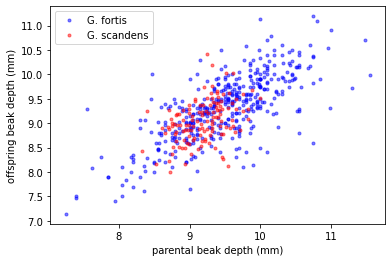

In [ ]:
# scatter plots
plt.plot(bd_parent_fortis, bd_offspring_fortis, marker='.', linestyle='none', color='blue', alpha=0.5)
plt.plot(bd_parent_scandens, bd_offspring_scandens, marker='.', linestyle='none', color='red', alpha=0.5)

#  labels
plt.xlabel('parental beak depth (mm)')
plt.ylabel('offspring beak depth (mm)')

# legend
plt.legend(('G. fortis', 'G. scandens'), loc='best')

# Show plot
plt.show()

The Fortis has a greater range of beak depths. But most importantly, it appears as though there is a stronger correlation than the Scandens. Next step is to quantify this observation. 
 
**linear regression vs. Pearson Correlation**
 
Earlier when comparing the data from 1975 and 2012 we used a linear regression. We wanted to model both datasets and be able to compare them. This tool is best used when predicting one value given another or in our case looking for statistically significant change over time. However, here we want to know the strength and direction of the two variables. A pearson correlation is a much better fit for this type of problem. Below I have rewritten the function for bootstrapping to use pearson. 

In [ ]:
def bs_pairs_pear(x, y, size=1):

    # Set up array of indices
    inds = np.arange(len(x))

    # Initialize replicates
    replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        corr_mat = np.corrcoef(bs_x, bs_y)
        replicates[i] = corr_mat[0,1]

    return replicates

In [ ]:
# Pearson correlation coefficients
r_scandens = np.corrcoef(bd_parent_scandens, bd_offspring_scandens)
r_fortis = np.corrcoef(bd_parent_fortis, bd_offspring_fortis)

# 1000 bootstrap replicates using Pearson
replicates_scandens = bs_pairs_pear(bd_parent_scandens, bd_offspring_scandens, size=1000)

replicates_fortis = bs_pairs_pear(bd_parent_fortis, bd_offspring_fortis, size=1000)


# confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

print('G. scandens:', r_scandens[0,1], conf_int_scandens)
print('G. fortis:', r_fortis[0,1], conf_int_fortis)

G. scandens: 0.4117063629401258 [0.27563076 0.55080949]
G. fortis: 0.7283412395518484 [0.66802568 0.77706182]


Fortis clearly is more strongly correlated. We know these two variables move together. That is a great tool. But we are only halfway there. What we need to find now is the covariance. 
 
**Why Covariance**
 
We know they move together. What more do we need to know? In this case we want to know the extent to which these two variables change in tandem. Covariance is a measure of correlation. In other words, we just found out that beak traits are heritable, not we want to know how heritable they are. 

In [ ]:
def bs_pairs_covariance(x, y, size=1):

    # Set up array of indices
    inds = np.arange(len(x))

    # Initialize replicates
    replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        cov_mat = np.cov(bs_x, bs_y)
        replicates[i] = cov_mat[0,1] / cov_mat[0,0]

    return replicates


def cov_of_heritability(parents, offspring):
  cov_matrix = np.cov(parents, offspring)
  return cov_matrix[0,1] / cov_matrix[0,0]

# Compute the heritability
heritability_scandens = cov_of_heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = cov_of_heritability(bd_parent_fortis, bd_offspring_fortis)

# replicants
replicates_scandens = bs_pairs_covariance(bd_parent_scandens, bd_offspring_scandens, size=1000)
        
replicates_fortis = bs_pairs_covariance(bd_parent_fortis, bd_offspring_fortis, size=1000)

#confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5,97.5])

print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.34384003 0.75202098]
G. fortis: 0.7229051911438156 [0.6523265  0.78976565]


Here we see that Fortis has stronger heritability. We could probably go one step further and say that some genetic trait in their beak size is a dominant gene. This is likely what we are seeing here. 
 
From a statistical standpoint this result is important and we only have one more step to go. The Pearson correlation is the coefficient of the ratio of a geometric mean of the variances of two sets of observations. Wow, that's a mouthful. But what is important is that when we do a pearson correlation that is not the full story. We need to step back and think about why we are seeing this correlation. And in some cases look at the covariance, like we have done here. 
 
Now, one last step. 
 
We are going to look at the p-value of our results. 


In [ ]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(1000000)

# Draw replicates
for i in range(1000000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = cov_of_heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


With a p-value of 0.0 we can say that this strongly suggests that the beak depth is a heritability trait. The fact that I pulled a million replicates and still have a p-value of 0 is impressive. 


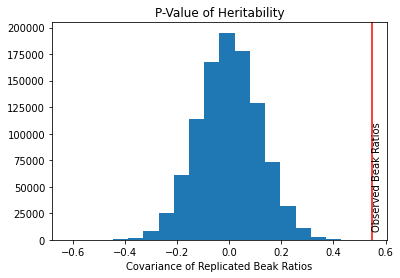

In [ ]:
plt.hist(perm_replicates, bins=20)
plt.axvline(heritability_scandens,color='r', label='Covariance of Heritability')
plt.text(heritability_scandens,10000,'Observed Beak Ratios',rotation=90)
plt.title('P-Value of Heritability')
plt.xlabel('Covariance of Replicated Beak Ratios')
plt.show()

**So you are saying there's a chance?**
 
This histogram takes the 1,000,000 permutations that we ran above. In plain english, we took this nearly 40 year period and pretended that the scandens were the only variety of finch on the island. And we ran the numbers a million times. What are the chances that we would see this beak ratio? 
 
The red line is our observed beak ratios. Which is well outside the million permutations that we ran. In other words there is **zero chance** that we would see this beak ratio without breeding with the Fortis. 
 
 